Name: Pranoti Musmade

Problem Statement: FWI Predictor – A Machine Learning Model to Predict Fire Weather Index

Module 1: Data Collection

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/prano/Downloads/FWI Dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [3]:
print("Statistical summary: ")
print(df.describe())

Statistical summary: 
              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC         ISI         BUI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean     0.760656   77.887705   14.673361    4.774180   16.664754  
std      1.999406   14.337571   12.368039    4.175318   14.204824  
min

In [4]:
print("\nColumn names: ")
print(df.columns)


Column names: 
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')


In [5]:
print("\nShape of the DataFrame: ")
print(df.shape)


Shape of the DataFrame: 
(244, 15)


In [6]:
print("\nData types of each column: ")
print(df.dtypes)


Data types of each column: 
day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object


In [7]:
print("\nNumber of unique values in each column: ")
print(df.nunique())


Number of unique values in each column: 
day             31
month            4
year             1
Temperature     19
 RH             62
 Ws             18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            126
Classes          8
Region           2
dtype: int64


Module 2: Data Exploration and  Data Preprocessing

In [8]:
print("\nMissing values in each column: ")
print(df.isnull().sum())


Missing values in each column: 
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [9]:
#df["FWI"].fillna(df["FWI"].mean(), inplace=True)
#df["DC"].fillna(df["DC"].mode(), inplace=True)

In [10]:
if 'Classes' in df.columns:
	df = df.drop(columns=['Classes'], axis=1,inplace=True)
else:
	print("'Classes' column not found in DataFrame.")

'Classes' column not found in DataFrame.


In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [12]:
print("\nNumber of duplicate rows: ")
print(df.duplicated().sum())


Number of duplicate rows: 
0


In [13]:
print("\nDataFrame Info: ")
df.info()


DataFrame Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [14]:
# Convert object columns to numeric
df["DC"] = pd.to_numeric(df["DC"], errors="coerce")
df["FWI"] = pd.to_numeric(df["FWI"], errors="coerce")

#convert DC to float
df["DC"] = df["DC"].astype(float)

# Convert FWI to float
df["FWI"] = df["FWI"].astype(float)

print(df.dtypes)


day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object


In [15]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Function to count outliers using IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Apply to all numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    print(f"{col}: {count_outliers_iqr(df, col)} outliers")

day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 2 outliers
 RH: 0 outliers
 Ws: 8 outliers
Rain : 35 outliers
FFMC: 16 outliers
DMC: 12 outliers
DC: 14 outliers
ISI: 4 outliers
BUI: 12 outliers
FWI: 4 outliers


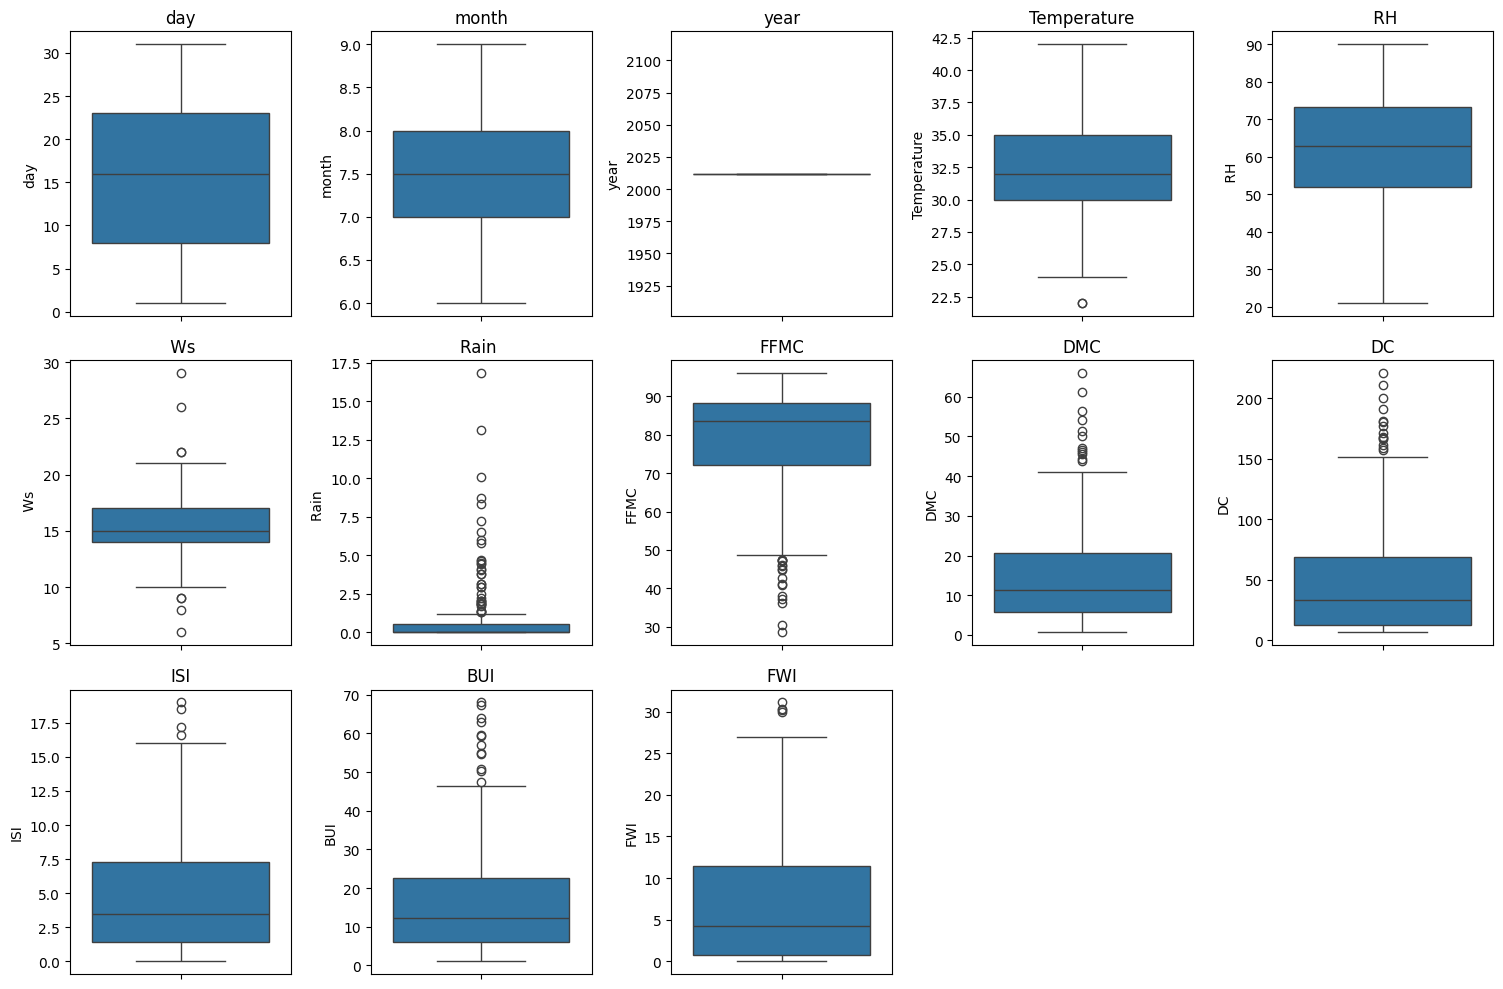

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [18]:
# Strip spaces from column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [19]:
import pandas as pd
import numpy as np

num_cols = ["Temperature", "RH", "Ws", "Rain", "FFMC",
            "DMC", "DC", "ISI", "BUI", "FWI"]

def detect_outliers(df, col):
    data = df[col].dropna()
    skewness = data.skew()

    if abs(skewness) < 0.5:
        # Z-score method
        mean, std = data.mean(), data.std()
        z_scores = np.abs((data - mean) / std)
        outliers = data[z_scores > 3]
        method = "Z-score"
        lower, upper = None, None
    else:
        # IQR method
        Q1, Q3 = np.nanpercentile(data, [25, 75])
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data < lower) | (data > upper)]
        method = "IQR"

    return {
        "column": col,
        "skewness": round(skewness, 3),
        "method": method,
        "num_outliers": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_indices": outliers.index.tolist()
    }

results = [detect_outliers(df, col) for col in num_cols]
outlier_summary = pd.DataFrame(results)
print(outlier_summary.to_string(index=False))

     column  skewness  method  num_outliers  lower_bound  upper_bound                                                                                                                                                     outlier_indices
Temperature    -0.196 Z-score             0          NaN          NaN                                                                                                                                                                  []
         RH    -0.238 Z-score             0          NaN          NaN                                                                                                                                                                  []
         Ws     0.546     IQR             8       9.5000      21.5000                                                                                                                               [2, 52, 105, 176, 199, 232, 237, 241]
       Rain     4.579     IQR            35      -0.7500       1

In [20]:
def cap_outliers(df, col, lower, upper):
    """Cap values outside [lower, upper]"""
    if lower is not None and upper is not None:
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Apply capping for skewed variables
for row in results:
    if row["method"] == "IQR" and row["num_outliers"] > 0:
        df = cap_outliers(df, row["column"], row["lower_bound"], row["upper_bound"])


In [21]:
# Function to count outliers using IQR
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Apply to all numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    print(f"{col}: {count_outliers_iqr(df, col)} outliers")

day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 2 outliers
RH: 0 outliers
Ws: 0 outliers


Rain: 0 outliers
FFMC: 0 outliers
DMC: 0 outliers
DC: 0 outliers
ISI: 0 outliers
BUI: 0 outliers
FWI: 0 outliers


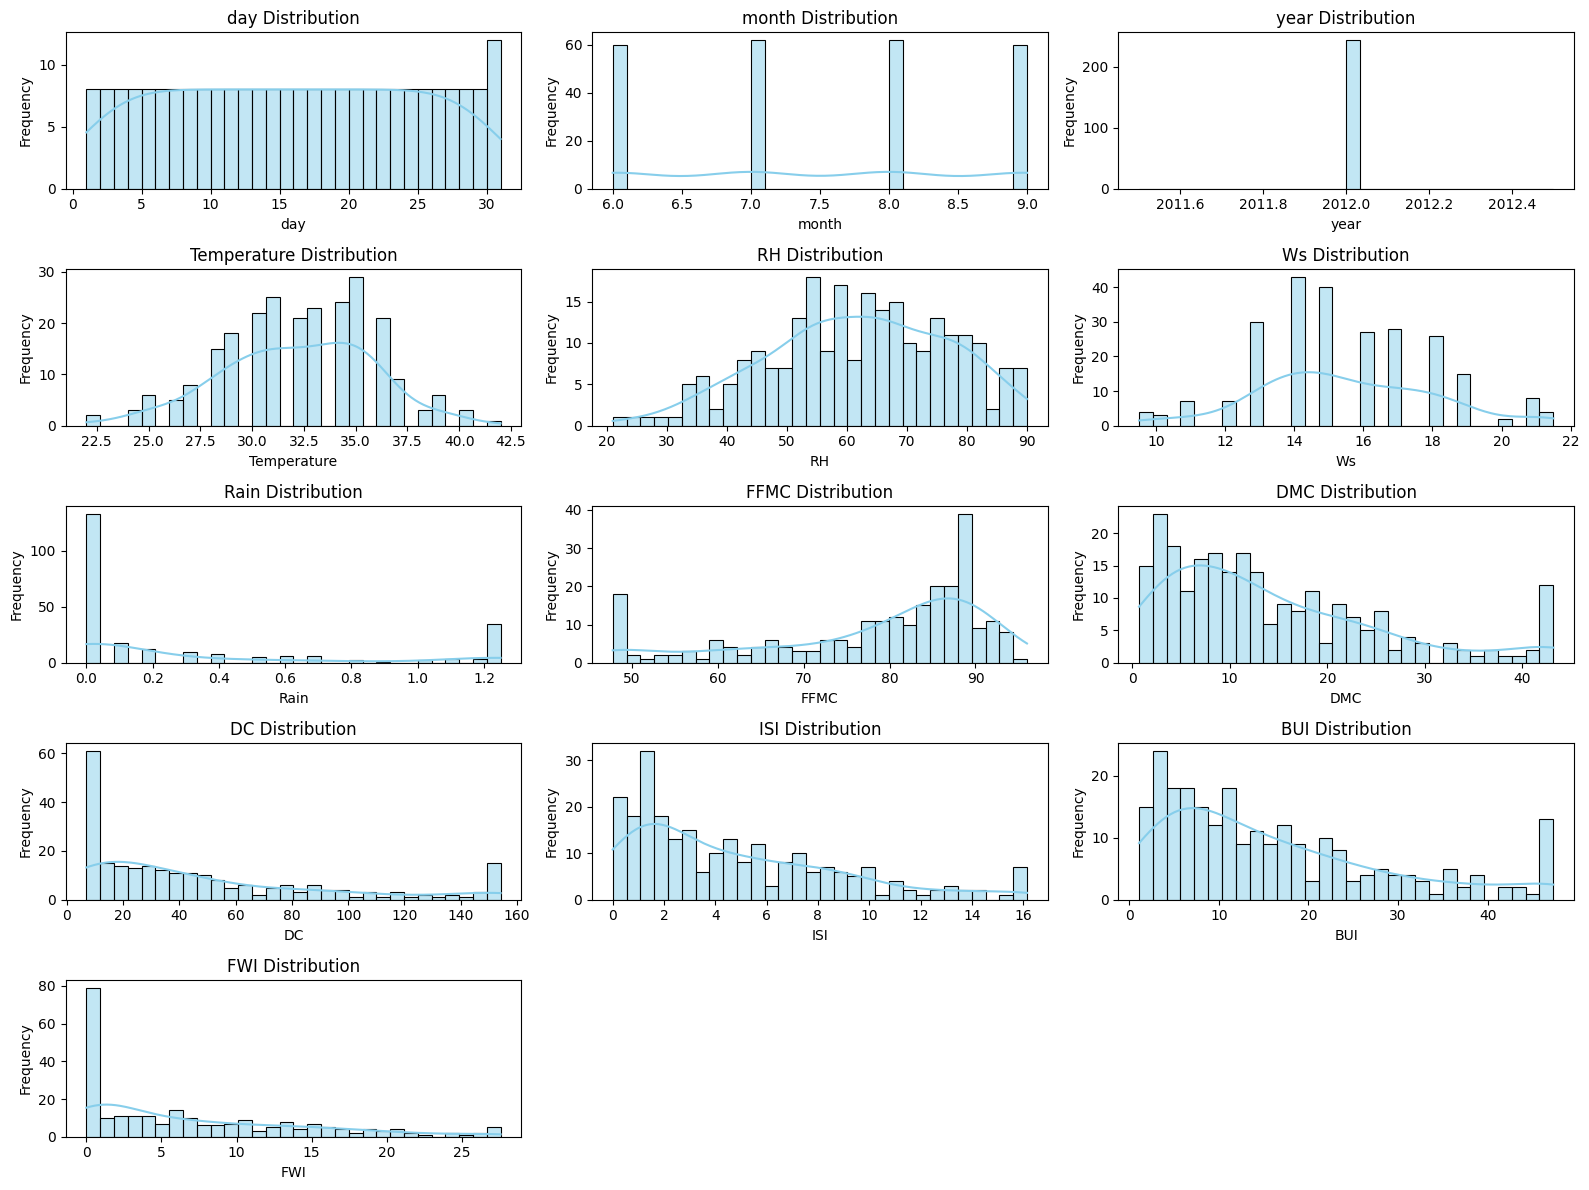

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # 3 plots per row
    sns.histplot(df[col], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f"{col} Distribution", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


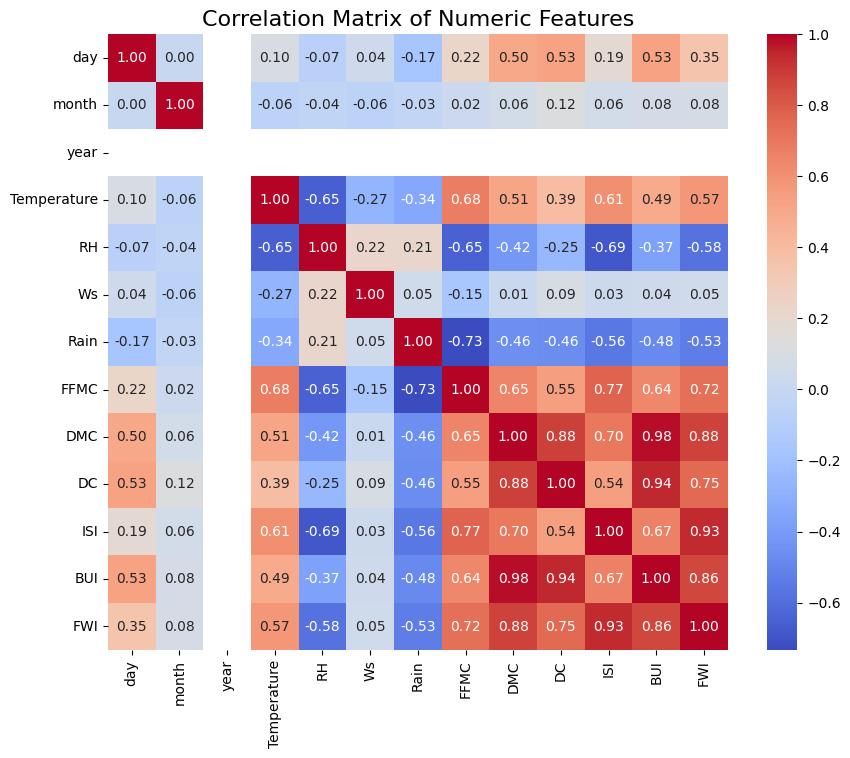

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


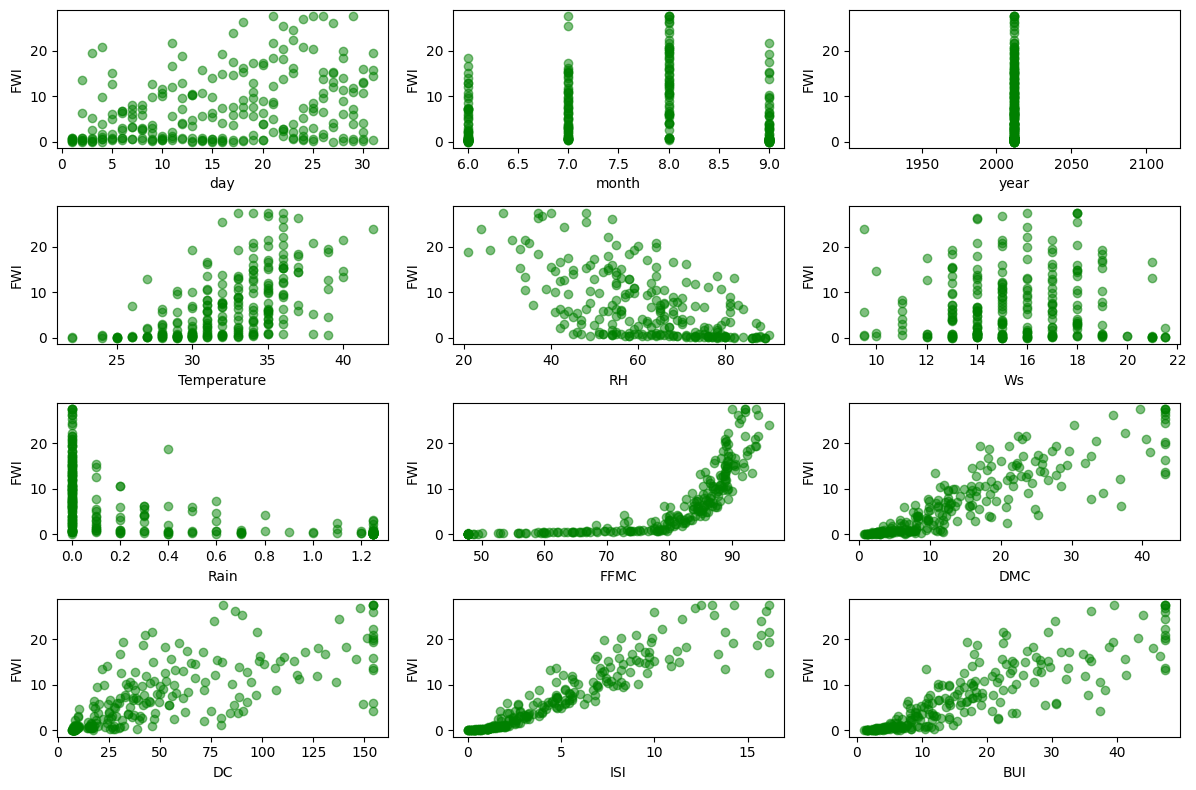

In [24]:
import math
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('FWI')

n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)  # 3 plots per row

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)
    plt.scatter(df[col], df['FWI'], color='green', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('FWI')
plt.tight_layout()
plt.show()


In [25]:
print(df['Region'].unique())

['Bejaia' 'Sidi-Bel Abbes']


In [26]:
!pip install scikit-learn

In [27]:
# Encoding 'Region' using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

# Check mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Region mapping:", mapping)

Region mapping: {'Bejaia': 0, 'Sidi-Bel Abbes': 1}


In [28]:
df.sample(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
27,28,6,2012,32,55,14.0,0.0,89.1,25.5,88.5,7.6,29.7,13.9,fire,0


In [29]:
# Save the cleaned dataset
df.to_csv("forest_fire_cleaned.csv", index=False)

print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


Module 3: Feature Engineering and Scaling

In [30]:
correlation = df.corr(numeric_only=True)['FWI'].sort_values(ascending=False)
print("Correlation with FWI:\n", correlation)

Correlation with FWI:
 FWI            1.000000
ISI            0.933007
DMC            0.877848
BUI            0.863710
DC             0.751663
FFMC           0.724432
Temperature    0.573492
day            0.350571
Region         0.197422
month          0.082591
Ws             0.046113
Rain          -0.533368
RH            -0.582015
year                NaN
Name: FWI, dtype: float64


dropping day, month and year as they are less correlated

In [31]:
import pandas as pd

df2 = pd.read_csv('forest_fire_cleaned.csv')
data = df2.drop(['day', 'month', 'year','Classes'], axis=1)

print("Columns after dropping day, month, Classes, and year:\n", data.columns.tolist())

Columns after dropping day, month, Classes, and year:
 ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [32]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

print("\nScaled numerical features:\n", data[num_cols].head())


Scaled numerical features:
    Temperature        RH        Ws      Rain      FFMC       DMC        DC  \
0    -0.874735 -0.332478  0.986238 -0.671196 -0.949599 -0.974456 -0.926425   
1    -0.874735 -0.063185 -0.967025  2.027745 -1.047666 -0.911796 -0.926425   
2    -1.702005  1.350607  2.353522  2.027745 -2.304621 -1.055018 -0.937896   
3    -1.977761  1.821872 -0.967025  2.027745 -2.304621 -1.162435 -0.942485   
4    -1.426248  1.013990  0.204933 -0.671196 -1.017491 -1.010261 -0.775008   

        ISI       BUI       FWI  Region  
0 -0.844058 -1.004880 -0.890582    -1.0  
1 -0.917524 -0.965434 -0.904307    -1.0  
2 -1.088945 -1.060104 -0.945481    -1.0  
3 -1.162411 -1.138995 -0.959206    -1.0  
4 -0.868547 -0.965434 -0.890582    -1.0  


In [33]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Region         0
dtype: int64

In [34]:
data['DC'].fillna(data['DC'].mean(), inplace=True)
data['FWI'].fillna(data['FWI'].mean(), inplace=True)

In [35]:
data.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

In [36]:
X = data.drop(['Region', 'FWI'], axis=1)
y = data['FWI']

print("Feature columns:\n", X.columns.tolist())
print("Target variable:", y.name)

Feature columns:
 ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
Target variable: FWI


In [37]:
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nScaled numerical features:\n", X[num_cols].head())


Scaled numerical features:
    Temperature        RH        Ws      Rain      FFMC       DMC        DC  \
0    -0.874735 -0.332478  0.986238 -0.671196 -0.949599 -0.974456 -0.928330   
1    -0.874735 -0.063185 -0.967025  2.027745 -1.047666 -0.911796 -0.928330   
2    -1.702005  1.350607  2.353522  2.027745 -2.304621 -1.055018 -0.939824   
3    -1.977761  1.821872 -0.967025  2.027745 -2.304621 -1.162435 -0.944422   
4    -1.426248  1.013990  0.204933 -0.671196 -1.017491 -1.010261 -0.776601   

        ISI       BUI  
0 -0.844058 -1.004880  
1 -0.917524 -0.965434  
2 -1.088945 -1.060104  
3 -1.162411 -1.138995  
4 -0.868547 -0.965434  


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (195, 9)
Testing set shape: (49, 9)


In [39]:
from joblib import dump, load

dump(scaler, "scaler.pkl")

scaler = load("scaler.pkl")

print("Scaler saved successfully as 'scaler.pkl'")

Scaler saved successfully as 'scaler.pkl'


In [40]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

Module 4: Model Training using Ridge Regression

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train)

#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

#ElasticNet Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)


ElasticNet(alpha=0.1)

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Dictionary to store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results[name] = {"Train Score": train_score, "Test Score": test_score}


print("\nModel Comparison based on Training and Testing Scores:")
print(f"{'Model':<22}{'Train Score':>15}{'Test Score':>15}")
print("-" * 52)

for name, score in results.items():
    print(f"{name:<22}{score['Train Score']:>15.4f}{score['Test Score']:>15.4f}")



Model Comparison based on Training and Testing Scores:
Model                     Train Score     Test Score
----------------------------------------------------
Linear Regression              0.9703         0.9903
Ridge Regression               0.9700         0.9901
Lasso Regression               0.9538         0.9706
ElasticNet Regression          0.9584         0.9736


All regression models achieved high accuracy, with R² scores above 0.95 on both training and testing data, indicating excellent model fit and generalization. Among them, Ridge Regression performed almost identically to Linear Regression but offers better control over overfitting due to its regularization term(Adding panelty to the error). Hence, Ridge Regression was selected for further evaluation and fine-tuning.

Tune the alpha parameter to balance bias-variance tradeoff:
    Low alpha → low bias, high variance (risk of overfitting)
    High alpha → high bias, low variance (risk of underfitting)

In [43]:
#Tune the alpha parameter(Regularization strength)

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha value found:", best_alpha)

Best alpha value found: 1


In [44]:
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

Ridge(alpha=1)

In [45]:
from sklearn.metrics import r2_score

y_train_pred = ridge_best.predict(X_train)
y_test_pred = ridge_best.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Evaluation:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Validation R² Score: {test_r2:.4f}")



Model Evaluation:
Training R² Score: 0.9700
Validation R² Score: 0.9901


In [46]:
import pickle

pickle.dump(ridge_best, open('ridge.pkl', 'wb'))

print("Model saved successfully as ridge.pkl")

Model saved successfully as ridge.pkl


Module 5: Evaluation and Optimization

In [47]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.0595


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.0851


In [49]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9901


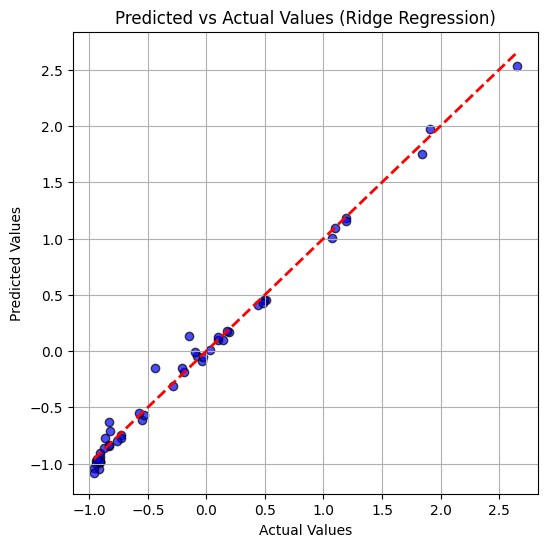

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Ridge Regression)")
plt.grid(True)
plt.show()

The plot shows that most points are very close to the red dashed line, meaning the model predicts values accurately. There’s no clear pattern of over- or under-prediction, so the model isn’t biased. The small scatter and uniform spread indicate low error and good generalization, which matches the high R² and low MAE/RMSE.